### Dependencies

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import datetime as dt

# # Import API key
from config import api_key

# api_key = "88be51871a5ea95df5fc68ecdfdb2ce1"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List 

In [6]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# print(cities)

600

### Perform API Calls 

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

In [8]:
ok_cities = []
ok_lat = []
ok_lon = []
ok_maxtemp = []
ok_mintemp = []
ok_humidity = []
ok_clouds = []
ok_wind = []
ok_country = []
ok_date = []

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        ok_cities.append(response["name"])
        ok_lat.append(response["coord"]["lat"])
        ok_lon.append(response["coord"]["lon"])
        ok_maxtemp.append(response["main"]["temp_max"])
        ok_mintemp.append(response["main"]["temp_min"])
        ok_humidity.append(response["main"]["humidity"])
        ok_clouds.append(response["clouds"]["all"])
        ok_wind.append(response["wind"]["speed"])
        ok_country.append(response["sys"]["country"])
        ok_date.append(response["dt"])
        print(f"Success! Appending {city}")
           
    except KeyError:
        print(f"Failed! No temp found for {city}")
print(response)

Success! Appending vila
Success! Appending mar del plata
Success! Appending dikson
Success! Appending bluff
Success! Appending khatanga
Success! Appending albany
Success! Appending prado
Success! Appending yellowknife
Success! Appending baghmara
Success! Appending volsk
Failed! No temp found for tumannyy
Success! Appending hilo
Success! Appending vaini
Failed! No temp found for taolanaro
Success! Appending punta arenas
Success! Appending husavik
Success! Appending okhotsk
Success! Appending hualmay
Success! Appending elko
Success! Appending victoria
Failed! No temp found for nizhneyansk
Failed! No temp found for zhanatas
Success! Appending tuktoyaktuk
Success! Appending paamiut
Success! Appending tuatapere
Success! Appending kapaa
Success! Appending manadhoo
Success! Appending tasiilaq
Success! Appending geraldton
Success! Appending provideniya
Success! Appending ribeira grande
Success! Appending rikitea
Failed! No temp found for attawapiskat
Success! Appending georgetown
Success! Appe

Success! Appending kongolo
Success! Appending maneadero
Success! Appending kardymovo
Success! Appending ornskoldsvik
Success! Appending samarai
Success! Appending oranjestad
Success! Appending mount isa
Success! Appending salalah
Success! Appending olafsvik
Success! Appending pedernales
Failed! No temp found for tawzar
Success! Appending veraval
Success! Appending tura
Success! Appending shepsi
Success! Appending honnali
Success! Appending hayrabolu
Success! Appending torbay
Success! Appending saiha
Success! Appending sitka
Success! Appending dehloran
Failed! No temp found for amderma
Success! Appending rovnoye
Success! Appending buala
Success! Appending noumea
Success! Appending labuhan
Success! Appending lima
Failed! No temp found for kamenskoye
Success! Appending estevan
Success! Appending leh
Success! Appending bereda
Success! Appending contamana
Success! Appending kot samaba
Success! Appending terney
Failed! No temp found for tillabery
Success! Appending maxixe
Success! Appending 

Success! Appending novobiryusinskiy
Success! Appending gagra
Success! Appending brigantine
Success! Appending tamahu
Success! Appending gizo
Success! Appending porto santo
Success! Appending belyye stolby
Success! Appending mangit
Success! Appending arlit
Success! Appending puerto ayacucho
Success! Appending sayyan
Success! Appending pozzallo
Success! Appending puerto montt
Success! Appending pringsewu
Success! Appending azuaga
Success! Appending manakara
Success! Appending itarema
Success! Appending hasaki
Success! Appending portobelo
Success! Appending lazaro cardenas
Success! Appending alghero
Success! Appending horasan
Failed! No temp found for fevralsk
Success! Appending klichka
Success! Appending sao miguel do araguaia
{'coord': {'lon': -50.1628, 'lat': -13.275}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.9, 'feels_like': 77.79, 'temp_min': 77.9, 'temp_max': 77.9, 'pressure': 1013, 'humidity':

In [9]:
print(len(ok_cities))
print(len(ok_lat))
print(len(ok_lon))
print(len(ok_maxtemp))
print(len(ok_mintemp))
print(len(ok_humidity))
print(len(ok_clouds))
print(len(ok_wind))
print(len(ok_country))
print(len(ok_date))

557
557
557
557
557
557
557
557
557
557


### Convert Raw Data to DataFrame 

In [10]:
weather_dict = {"City": ok_cities, "Latitude": ok_lat, "Longitude": ok_lon, "Max Temp": ok_maxtemp, 
                "Humidity": ok_humidity, "Cloudiness": ok_clouds, "Wind Speed": ok_wind, 
                "Country": ok_country, "Date": ok_date}

weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vila,42.0304,-8.1588,51.01,93,100,8.99,PT,1621816606
1,Mar del Plata,-38.0023,-57.5575,56.12,51,40,10.00,AR,1621816551
2,Dikson,73.5069,80.5464,28.40,84,93,14.14,RU,1621816386
3,Bluff,-46.6000,168.3333,49.80,61,76,7.78,NZ,1621816606
4,Khatanga,71.9667,102.5000,38.35,96,100,6.98,RU,1621816553
...,...,...,...,...,...,...,...,...,...
552,Lázaro Cárdenas,17.9583,-102.2000,82.15,65,0,8.79,MX,1621816765
553,Alghero,40.5589,8.3181,70.99,88,0,13.80,IT,1621816765
554,Horasan,40.0458,42.1728,48.90,93,56,0.69,TR,1621816765
555,Klichka,50.4457,117.9960,42.01,52,100,21.65,RU,1621816766


### Inspect data and remove cities where the humidty is > 100%

In [11]:
low_hum = pd.DataFrame(weather_df[weather_df["Humidity"]< 100])
low_hum

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vila,42.0304,-8.1588,51.01,93,100,8.99,PT,1621816606
1,Mar del Plata,-38.0023,-57.5575,56.12,51,40,10.00,AR,1621816551
2,Dikson,73.5069,80.5464,28.40,84,93,14.14,RU,1621816386
3,Bluff,-46.6000,168.3333,49.80,61,76,7.78,NZ,1621816606
4,Khatanga,71.9667,102.5000,38.35,96,100,6.98,RU,1621816553
...,...,...,...,...,...,...,...,...,...
552,Lázaro Cárdenas,17.9583,-102.2000,82.15,65,0,8.79,MX,1621816765
553,Alghero,40.5589,8.3181,70.99,88,0,13.80,IT,1621816765
554,Horasan,40.0458,42.1728,48.90,93,56,0.69,TR,1621816765
555,Klichka,50.4457,117.9960,42.01,52,100,21.65,RU,1621816766


In [12]:
#https://stackoverflow.com/questions/21738566/how-to-set-a-variable-to-be-todays-date-in-python-pandas
date = dt.date.today().strftime("%m/%d/%y")
date

'05/23/21'

## Plotting the Data 

### Latitude vs. Temperature Plot 

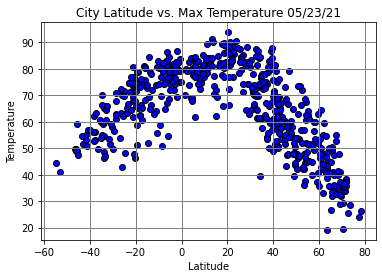

In [13]:
plot_lat = low_hum['Latitude']
plot_temp = low_hum["Max Temp"]

plt.scatter(plot_lat, plot_temp, marker="o", facecolors = "blue", edgecolors="black", 
            alpha=.99)

plt.grid(color="grey", linestyle="-", linewidth=1)
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("output_data/maxtemp.png", dpi=150)

### Latitude vs. Humidty Plot

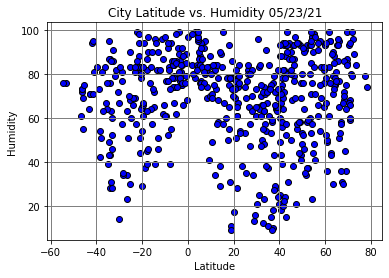

In [14]:
plot_lat = low_hum['Latitude']
plot_humidity = low_hum["Humidity"]

plt.scatter(plot_lat, plot_humidity, marker="o", facecolors = "blue", edgecolors="black", 
            alpha=.99)

plt.grid(color="grey", linestyle="-", linewidth=1)
plt.title(f"City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/humidity.png", dpi=150)

### Latitude vs. Cloudiness Plot

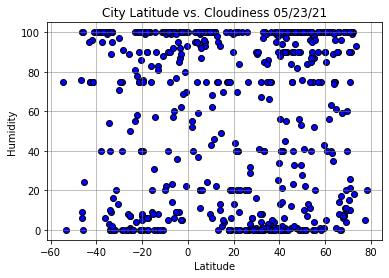

In [15]:
plot_lat = low_hum['Latitude']
plot_cloud = low_hum["Cloudiness"]

plt.scatter(plot_lat, plot_cloud, marker="o", facecolors = "blue", edgecolors="black", 
            alpha=.99)

plt.grid(color="grey", linestyle="-", linewidth=.5)
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/clouds.png", dpi=150)

###  Latitude vs. Wind Speed Plot

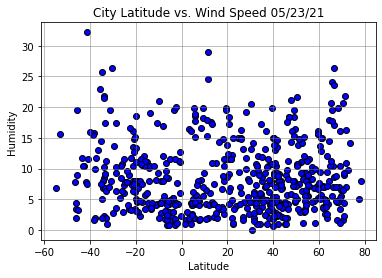

In [16]:
plot_lat = low_hum['Latitude']
plot_wind = low_hum["Wind Speed"]

plt.scatter(plot_lat, plot_wind, marker="o", facecolors = "blue", edgecolors="black", 
            alpha=.99)

plt.grid(color="grey", linestyle="-", linewidth=.5)
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/windspeed.png", dpi=150)

## Linear Regression

In [17]:
north_hem = pd.DataFrame(low_hum[low_hum["Latitude"]> 0])
north_hem.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vila,42.0304,-8.1588,51.01,93,100,8.99,PT,1621816606
2,Dikson,73.5069,80.5464,28.40,84,93,14.14,RU,1621816386
4,Khatanga,71.9667,102.5000,38.35,96,100,6.98,RU,1621816553
5,Albany,42.6001,-73.9662,63.54,57,98,9.17,US,1621816439
7,Yellowknife,62.4560,-114.3525,59.52,44,40,7.00,CA,1621816355


In [18]:
north_lat = north_hem["Latitude"]
north_maxtemp = north_hem["Max Temp"]
north_humid = north_hem["Humidity"]
north_cloud = north_hem["Cloudiness"]
north_wind = north_hem["Wind Speed"]

In [19]:
south_hem = pd.DataFrame(low_hum[low_hum["Latitude"]< 0])
south_hem.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Mar del Plata,-38.0023,-57.5575,56.12,51,40,10.00,AR,1621816551
3,Bluff,-46.6000,168.3333,49.80,61,76,7.78,NZ,1621816606
6,Prado,-17.3411,-39.2208,74.89,90,6,10.56,BR,1621816607
11,Vaini,-21.2000,-175.2000,73.40,88,75,16.11,TO,1621816608
12,Punta Arenas,-53.1500,-70.9167,41.11,76,0,15.59,CL,1621816320


In [20]:
south_lat = south_hem["Latitude"]
south_maxtemp = south_hem["Max Temp"]
south_humid = south_hem["Humidity"]
south_cloud = south_hem["Cloudiness"]
south_wind = south_hem["Wind Speed"]

### Northern Hemisphere: Max Temp vs. Latitude Linear Regression
The linear regression below shows a strong negative correlation. The temperature decreases further from the equator. 

The r-value is -0.83


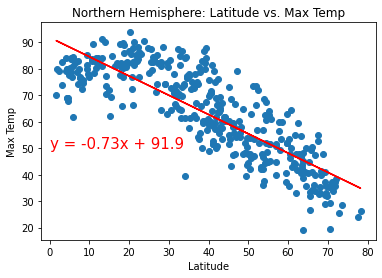

In [21]:
correlation = st.pearsonr(north_lat, north_maxtemp)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_maxtemp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_maxtemp)
plt.plot(north_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere: Latitude vs. Max Temp")
print(f"The r-value is {round(correlation[0],2)}")
plt.savefig("output_data/north_maxtemp.png", dpi=150)
plt.show()

### Southern Hemisphere: Max Temp vs. Latitude Linear Regression 
The linear regression below shows a postive correlation. The temperature increases closer to the equator.

The r-value is 0.75


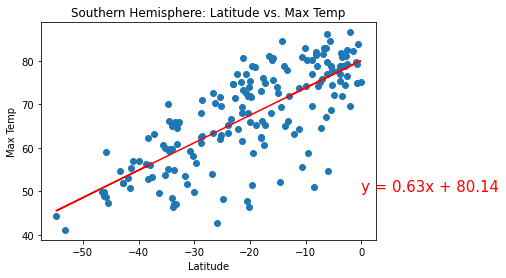

In [22]:
correlation = st.pearsonr(south_lat, south_maxtemp)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_maxtemp)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_maxtemp)
plt.plot(south_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere: Latitude vs. Max Temp")
print(f"The r-value is {round(correlation[0],2)}")
plt.savefig("output_data/south_maxtemp.png", dpi=150)
plt.show()

### Northern Hemisphere: Humidty (%) vs. Latitude Linear Regression 
There is a weak postive correlation between latitude and humidity. 

The r-value is -0.0


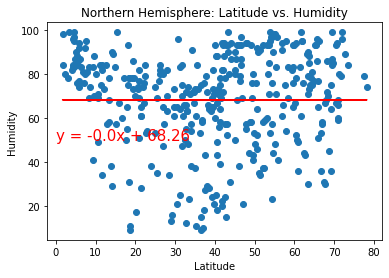

In [23]:
correlation = st.pearsonr(north_lat, north_humid)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_humid)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_humid)
plt.plot(north_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere: Latitude vs. Humidity")
print(f"The r-value is {round(correlation[0],2)}")
plt.savefig("output_data/north_humidity.png", dpi=150)
plt.show()

### Southern Hemisphere: Humidty (%) vs. Latitude Linear Regression 
There is a weak postive correlation between latitude and humidity. 

The r-value is 0.26


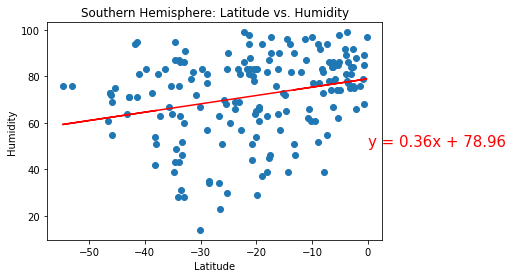

In [24]:
correlation = st.pearsonr(south_lat, south_humid)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_humid)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_humid)
plt.plot(south_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere: Latitude vs. Humidity")
print(f"The r-value is {round(correlation[0],2)}")
plt.savefig("output_data/south_humidity.png", dpi=150)
plt.show()

### Northern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression
There is a weak postive correlation between latitude and cloudiness. 

The r-value is 0.04


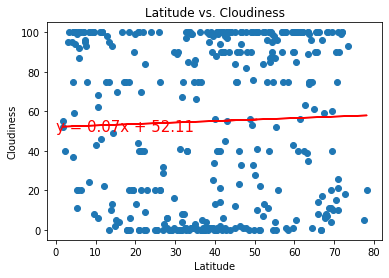

In [25]:
correlation = st.pearsonr(north_lat, north_cloud)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_cloud)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_cloud)
plt.plot(north_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs. Cloudiness")
print(f"The r-value is {round(correlation[0],2)}")
plt.savefig("output_data/north_cloud.png", dpi=150)
plt.show()

### Southern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression 
There is a weak postive correlation between latitude and cloudiness regardless of hemisphere. 

The r-value is 0.1


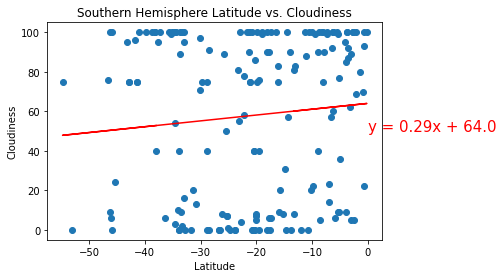

In [26]:
correlation = st.pearsonr(south_lat, south_cloud)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_cloud)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_cloud)
plt.plot(south_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere Latitude vs. Cloudiness")
print(f"The r-value is {round(correlation[0],2)}")
plt.savefig("output_data/south_cloud.png", dpi=150)
plt.show()

### Northern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression 
There is no correlation between hemisphere and wind speed in the northern hemisphere. 

The r-value is 0.06


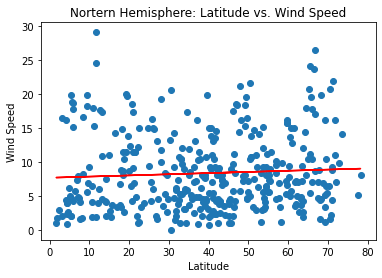

In [27]:
correlation = st.pearsonr(north_lat, north_wind)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_wind)
plt.plot(north_lat,regress_values, "r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Nortern Hemisphere: Latitude vs. Wind Speed")
print(f"The r-value is {round(correlation[0],2)}")
plt.savefig("output_data/north_wind.png", dpi=150)
plt.show()

### Southern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression 
There a slightly weak negative correlation between windspeed and latitude in the southern hemisphere. 

The r-value is -0.27


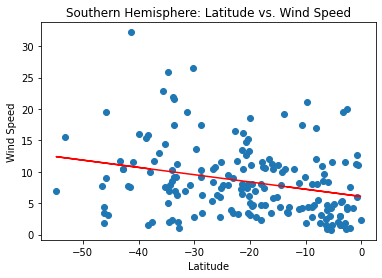

In [28]:
correlation = st.pearsonr(south_lat, south_wind)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_wind)
plt.plot(south_lat,regress_values, "r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere: Latitude vs. Wind Speed")
print(f"The r-value is {round(correlation[0],2)}")

plt.savefig("output_data/south_wind.png", dpi=150)
plt.show()


In [29]:
weather_df.to_csv("output_data/cities.csv", index=False, header=True)

### Weather Analysis
1. Lower humidity shows lower windspeed regardless of latitude. 
2. There is a stronger correlation of latitude vs max temperature in the northern hemispher (-.87) compared to the southern hemisphere (.35)
3. The correlation of latitude vs humidity in hte northwern and southern hemisphere is very close. Northern hemisphere is .4 and southern is .36. 